In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
import geopandas as gpd
import os
from datetime import datetime, timedelta
import random
from IPython.display import display, clear_output
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
from PIL import Image, ImageDraw


In [2]:
#Anpassende Variablen bestimmen

#Annahme: Anzahl Stunden pro Tag
stunden_verkehrstag = 12

#Annahme: Verteilung der Nachfrage auf Zonen
prozent_verteilung_hoch = 0.5
prozent_verteilung_mittel = 0.3 
prozent_verteilung_niedrig = 0.2

#Annahme: Meilen Egg Zahlen ähnlich wie Oetwil Männedorf
Neues_Verkehrsaufkommen_Meilen_Egg_oev = 72 #Anzahl Fahrten pro Tag

In [3]:
# Pfad zur CSV-Datei
csv_datei = 'C:/Users/Linus/Documents/BA/KTZH_00001982_00003903(1).csv'

# CSV-Datei einlesen
daten = pd.read_csv(csv_datei)

# Die eingelesenen Daten anzeigen
#print(daten)

In [4]:
#Daten aus GIS Analyse importieren

# Gemeindegrenzen einlesen
gemeindengrenzen_gdf = gpd.read_file('C:/Users/Linus/Documents/Gemeindegrenzen.shp')

# Strassennetz einlesen
strassennetz_gdf = gpd.read_file('C:/Users/Linus/Documents/Strassen1.shp')

# Einlesen der niedrigen Bevölkerungszonen 
# Liste der Dateipfade zu den Shapefiles (.shp) und Geopackage-Dateien (.gpkg) der verschiedenen Gemeinden
shapefile_paths = ['C:/Users/Linus/Documents/Gebaut.shp', 'C:/Users/Linus/Documents/W1Gebaut.shp']
geopackage_paths = ['C:/Users/Linus/Documents/W30.gpkg', 'C:/Users/Linus/Documents/W2Uster.gpkg']

# Einzelne GeoDataFrames für jede Gemeinde erstellen und sie in einer Liste speichern
gemeinden_gdfs = []
for shapefile_path in shapefile_paths:
    gemeinden_gdfs.append(gpd.read_file(shapefile_path))
for geopackage_path in geopackage_paths:
    gemeinden_gdfs.append(gpd.read_file(geopackage_path))

# Alle GeoDataFrames zu einem großen GeoDataFrame zusammenfügen
gemeinden_niedrige_Dichte_gdfs = gpd.GeoDataFrame(pd.concat(gemeinden_gdfs, ignore_index=True))

# Einlesen der höheren Bevölkerungszonen
# Liste der Dateipfade Geopackage-Dateien (.gpkg) der verschiedenen Gemeinden
geopackage_paths = ['C:/Users/Linus/Documents/W2Gebaut.gpkg', 'C:/Users/Linus/Documents/W2.gpkg', 'C:/Users/Linus/Documents/W3Uster.gpkg', 'C:/Users/Linus/Documents/W60.gpkg']

# Einzelne GeoDataFrames für jede Gemeinde erstellen und sie in einer Liste speichern
gemeinden_gdfs = []
for geopackage_path in geopackage_paths:
    gemeinden_gdfs.append(gpd.read_file(geopackage_path))

# Alle GeoDataFrames zu einem großen GeoDataFrame zusammenfügen
gemeinden_höhere_Dichte_gdfs = gpd.GeoDataFrame(pd.concat(gemeinden_gdfs, ignore_index=True))

# Einlesen der zentralen Bevölkerungszonen
# Liste der Dateipfade zu den Shapefiles (.shp) und Geopackage-Dateien (.gpkg) der verschiedenen Gemeinden
shapefile_paths = ['C:/Users/Linus/Documents/Zentrum&Gewerbe.shp', 'C:/Users/Linus/Documents/ZonenOe.shp']
geopackage_paths = ['C:/Users/Linus/Documents/Zentrum.gpkg', 'C:/Users/Linus/Documents/ZentrumUster.gpkg', 'C:/Users/Linus/Documents/ZentrumEgg.gpkg']

# Einzelne GeoDataFrames für jede Gemeinde erstellen und sie in einer Liste speichern
gemeinden_gdfs = []
for shapefile_path in shapefile_paths:
    gemeinden_gdfs.append(gpd.read_file(shapefile_path))
for geopackage_path in geopackage_paths:
    gemeinden_gdfs.append(gpd.read_file(geopackage_path))

# Alle GeoDataFrames zu einem großen GeoDataFrame zusammenfügen
gemeinden_zentral_gdfs = gpd.GeoDataFrame(pd.concat(gemeinden_gdfs, ignore_index=True))

In [5]:
print(gemeinden_zentral_gdfs[gemeinden_zentral_gdfs['GEMEINDE'] == 'Meilen'])

    ARE_NR  BFSNR GEMEINDE TYP_GDE_CO TYP_GDE_AB                   TYP_GDE_BE  \
0       45    156   Meilen    C130715     K 3/GP                   Kernzone 3   
1       45    156   Meilen    C120102      G 2.5              Gewerbezone 2.5   
2       45    156   Meilen    C130714     K 2/GP                   Kernzone 2   
3       45    156   Meilen    C140101   Z 3.2/GP             Zentrumszone 3.2   
4       45    156   Meilen    C140112   Z 4.5/GP             Zentrumszone 4.5   
5       45    156   Meilen    C130715     K 3/GP                   Kernzone 3   
6       45    156   Meilen    C130714        K 2                   Kernzone 2   
7       45    156   Meilen    C130714     K 2/GP                   Kernzone 2   
8       45    156   Meilen    C140112      Z 4.5             Zentrumszone 4.5   
9       45    156   Meilen    C140112   Z 4.5/GP             Zentrumszone 4.5   
10      45    156   Meilen    C140112   Z 4.5/GP             Zentrumszone 4.5   
11      45    156   Meilen  

In [17]:
print(gemeinden_zentral_gdfs)

     ARE_NR  BFSNR GEMEINDE TYP_GDE_CO TYP_GDE_AB  \
0        45    156   Meilen    C130715     K 3/GP   
1        45    156   Meilen    C120102      G 2.5   
2        45    156   Meilen    C130714     K 2/GP   
3        45    156   Meilen    C140101   Z 3.2/GP   
4        45    156   Meilen    C140112   Z 4.5/GP   
..      ...    ...      ...        ...        ...   
192      39    192      Egg    C140101       Z/GP   
193      39    192      Egg    C150101        öBA   
194      39    192      Egg    C130701         KI   
195      39    192      Egg    C130711        KII   
196      39    192      Egg    C130701         KI   

                                  TYP_GDE_BE CODE_ARE ABK_ARE WMIX  \
0                                 Kernzone 3    C1307       K    M   
1                            Gewerbezone 2.5    C1201   IG-HD    I   
2                                 Kernzone 2    C1307       K    M   
3                           Zentrumszone 3.2   C14010      Z3    M   
4            

In [6]:


# Annahme: df ist Ihr DataFrame
gemeinden_niedrige_Dichte_gdfs.to_csv('gemeinden_niedrige_Dichte_gdfs.csv', index=False)  # Speichern als CSV-Datei ohne Index
gemeinden_niedrige_Dichte_gdfs.type

0           Polygon
1           Polygon
2           Polygon
3           Polygon
4           Polygon
           ...     
169    MultiPolygon
170    MultiPolygon
171    MultiPolygon
172    MultiPolygon
173    MultiPolygon
Length: 174, dtype: object

In [7]:
# Liste der gewünschten Gemeinden und Zielnamen
gewuenschte_gemeinden = ['Meilen', 'Egg', 'Uster']
gewuenschte_zielnamen = ['Meilen', 'Egg', 'Uster']  
gewuenschte_kategorien = ['Verkehrsaufkommen']
gewuenschte_verkehrsmittel = ['oev']
gewuenschtes_jahr = 2018   

# Filtern der Daten nach den gewünschten Bedingungen
daten_filtered = daten[(daten['jahr'] == gewuenschtes_jahr) & 
                       (daten['quelle_name'].isin(gewuenschte_gemeinden)) &
                       (daten['ziel_name'].isin(gewuenschte_zielnamen)) &
                       (daten['kategorie'].isin(gewuenschte_kategorien)) &
                       (daten['verkehrsmittel'].isin(gewuenschte_verkehrsmittel))]

# Filtern des DataFrames für jeden Zielort mit der zusätzlichen Bedingung
daten_meilen = daten_filtered[(daten_filtered['quelle_name'] == 'Meilen') & (daten_filtered['quelle_name'] != daten_filtered['ziel_name'])]
daten_egg = daten_filtered[(daten_filtered['quelle_name'] == 'Egg') & (daten_filtered['quelle_name'] != daten_filtered['ziel_name'])]
daten_uster = daten_filtered[(daten_filtered['quelle_name'] == 'Uster') & (daten_filtered['quelle_name'] != daten_filtered['ziel_name'])]

# Summieren der Nachfrage für jeden Zielort
#nachfrage_meilen = int(daten_meilen['wert'].sum()/stunden_verkehrstag)
nachfrage_meilen = int(Neues_Verkehrsaufkommen_Meilen_Egg_oev/stunden_verkehrstag)
nachfrage_egg = int(daten_egg['wert'].sum()/stunden_verkehrstag)
nachfrage_uster = int(daten_uster['wert'].sum()/stunden_verkehrstag)

# Verteilen der Gesamtnachfrage entsprechend den Prozentsätzen auf die verschiedenen Zonen
gesamtnachfrage = nachfrage_meilen + nachfrage_egg + nachfrage_uster

nachfrage_meilen_zentral = int(prozent_verteilung_hoch * nachfrage_meilen)
nachfrage_meilen_höhere_Dichte = int(prozent_verteilung_mittel * nachfrage_meilen)
nachfrage_meilen_niedrige_Dichte = int(prozent_verteilung_niedrig * nachfrage_meilen)

nachfrage_egg_zentral = int(prozent_verteilung_hoch * nachfrage_egg)
nachfrage_egg_höhere_Dichte = int(prozent_verteilung_mittel * nachfrage_egg)
nachfrage_egg_niedrige_Dichte = int(prozent_verteilung_niedrig * nachfrage_egg)

nachfrage_uster_zentral = int(prozent_verteilung_hoch * nachfrage_uster)
nachfrage_uster_höhere_Dichte = int(prozent_verteilung_mittel * nachfrage_uster)
nachfrage_uster_niedrige_Dichte = int(prozent_verteilung_niedrig * nachfrage_uster)

print('Nachfrage Meilen zentral:', nachfrage_meilen_zentral)

Nachfrage Meilen zentral: 3


In [8]:
print(daten)

        jahr  quelle_code        quelle_name quelle_gebietart  ziel_code  \
0       2018            1    Aeugst am Albis         Gemeinde          1   
1       2018            1    Aeugst am Albis         Gemeinde          1   
2       2018            1    Aeugst am Albis         Gemeinde          1   
3       2018            1    Aeugst am Albis         Gemeinde          1   
4       2018            1    Aeugst am Albis         Gemeinde          2   
...      ...          ...                ...              ...        ...   
233923  2040        10009  Schaffhausen (A4)   Aussenkorridor      10008   
233924  2040        10009  Schaffhausen (A4)   Aussenkorridor      10009   
233925  2040        10009  Schaffhausen (A4)   Aussenkorridor      10009   
233926  2040        10009  Schaffhausen (A4)   Aussenkorridor      10009   
233927  2040        10009  Schaffhausen (A4)   Aussenkorridor      10009   

                 ziel_name  ziel_gebietart          kategorie verkehrsmittel  \
0      

In [9]:
def verteile_nachfragepunkte(gemeinde, nachfrage_zentral, nachfrage_höhere_Dichte, nachfrage_niedrige_Dichte, gemeinden_zentral_gdfs, gemeinden_höhere_Dichte_gdfs, gemeinden_niedrige_Dichte_gdfs):
    nachfragepunkte_zentral = np.random.choice(gemeinden_zentral_gdfs[gemeinden_zentral_gdfs['GEMEINDE'] == gemeinde].index, size=nachfrage_zentral)
    nachfragepunkte_höhere_Dichte = np.random.choice(gemeinden_höhere_Dichte_gdfs[gemeinden_höhere_Dichte_gdfs['GEMEINDE'] == gemeinde].index, size=nachfrage_höhere_Dichte)
    nachfragepunkte_niedrige_Dichte = np.random.choice(gemeinden_niedrige_Dichte_gdfs[gemeinden_niedrige_Dichte_gdfs['GEMEINDE'] == gemeinde].index, size=nachfrage_niedrige_Dichte)
    return nachfragepunkte_zentral, nachfragepunkte_höhere_Dichte, nachfragepunkte_niedrige_Dichte

# Beispielaufruf:
nachfrage_meilen_zentral, nachfrage_meilen_höhere_Dichte, nachfrage_meilen_niedrige_Dichte = verteile_nachfragepunkte('Meilen', nachfrage_meilen_zentral, nachfrage_meilen_höhere_Dichte, nachfrage_meilen_niedrige_Dichte, gemeinden_zentral_gdfs, gemeinden_höhere_Dichte_gdfs, gemeinden_niedrige_Dichte_gdfs)
print(nachfrage_meilen_zentral)

[41 29 20]


In [10]:
print(nachfrage_meilen)

6


In [11]:
# Zufällige Verteilung der Nachfragepunkte in den Zonen
nachfrage_meilen_zentral = np.random.choice(gemeinden_zentral_gdfs[gemeinden_zentral_gdfs['GEMEINDE'] == 'Meilen'].index, size=nachfrage_meilen_zentral)
nachfrage_meilen_höhere_Dichte = np.random.choice(gemeinden_höhere_Dichte_gdfs[gemeinden_höhere_Dichte_gdfs['GEMEINDE'] == 'Meilen'].index, size=nachfrage_meilen_höhere_Dichte)
nachfrage_meilen_niedrige_Dichte = np.random.choice(gemeinden_niedrige_Dichte_gdfs[gemeinden_niedrige_Dichte_gdfs['GEMEINDE'] == 'Meilen'].index, size=nachfrage_meilen_niedrige_Dichte)

nachfrage_egg_zentral = np.random.choice(gemeinden_zentral_gdfs[gemeinden_zentral_gdfs['GEMEINDE'] == 'Egg'].index, size=nachfrage_egg_zentral)
nachfrage_egg_höhere_Dichte = np.random.choice(gemeinden_höhere_Dichte_gdfs[gemeinden_höhere_Dichte_gdfs['GEMEINDE'] == 'Egg'].index, size=nachfrage_egg_höhere_Dichte)
nachfrage_egg_niedrige_Dichte = np.random.choice(gemeinden_niedrige_Dichte_gdfs[gemeinden_niedrige_Dichte_gdfs['GEMEINDE'] == 'Egg'].index, size=nachfrage_egg_niedrige_Dichte)

nachfrage_uster_zentral = np.random.choice(gemeinden_zentral_gdfs[gemeinden_zentral_gdfs['GEMEINDE'] == 'Uster'].index, size=nachfrage_uster_zentral)
nachfrage_uster_höhere_Dichte = np.random.choice(gemeinden_höhere_Dichte_gdfs[gemeinden_höhere_Dichte_gdfs['GEMEINDE'] == 'Uster'].index, size=nachfrage_uster_höhere_Dichte)
nachfrage_uster_niedrige_Dichte = np.random.choice(gemeinden_niedrige_Dichte_gdfs[gemeinden_niedrige_Dichte_gdfs['GEMEINDE'] == 'Uster'].index, size=nachfrage_uster_niedrige_Dichte)


In [12]:
print(nachfrage_meilen_niedrige_Dichte)

[29 31 31]


In [13]:
# Erstelle eine Funktion, um zufällige Zeitstempel zu generieren
def generate_random_timestamp(start, end, n):
    time_diff = (end - start).total_seconds()
    random_seconds = np.random.randint(0, int(time_diff), n)
    return [start + pd.Timedelta(seconds=sec) for sec in random_seconds]

# Definiere den Zeitbereich, in dem die Zeitstempel liegen sollen
start_timestamp = pd.Timestamp('2018-04-20 09:00:00')
end_timestamp = pd.Timestamp('2018-04-21 10:00:00')

# Füge den Nachfragepunkten in den verschiedenen Zonen einen zufälligen Zeitstempel hinzu
nachfrage_meilen_zentral_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_meilen_zentral))
nachfrage_meilen_höhere_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_meilen_höhere_Dichte))
nachfrage_meilen_niedrige_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_meilen_niedrige_Dichte))

nachfrage_egg_zentral_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_egg_zentral))
nachfrage_egg_höhere_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_egg_höhere_Dichte))
nachfrage_egg_niedrige_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_egg_niedrige_Dichte))

nachfrage_uster_zentral_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_uster_zentral))
nachfrage_uster_höhere_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_uster_höhere_Dichte))
nachfrage_uster_niedrige_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_uster_niedrige_Dichte))

# Füge die Zeitstempel den DataFrames hinzu
gemeinden_zentral_gdfs.loc[nachfrage_meilen_zentral, 'timestamp'] = nachfrage_meilen_zentral_timestamps
gemeinden_höhere_Dichte_gdfs.loc[nachfrage_meilen_höhere_Dichte, 'timestamp'] = nachfrage_meilen_höhere_Dichte_timestamps
gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_meilen_niedrige_Dichte, 'timestamp'] = nachfrage_meilen_niedrige_Dichte_timestamps

gemeinden_zentral_gdfs.loc[nachfrage_egg_zentral, 'timestamp'] = nachfrage_egg_zentral_timestamps
gemeinden_höhere_Dichte_gdfs.loc[nachfrage_egg_höhere_Dichte, 'timestamp'] = nachfrage_egg_höhere_Dichte_timestamps
gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_egg_niedrige_Dichte, 'timestamp'] = nachfrage_egg_niedrige_Dichte_timestamps

gemeinden_zentral_gdfs.loc[nachfrage_uster_zentral, 'timestamp'] = nachfrage_uster_zentral_timestamps
gemeinden_höhere_Dichte_gdfs.loc[nachfrage_uster_höhere_Dichte, 'timestamp'] = nachfrage_uster_höhere_Dichte_timestamps
gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_uster_niedrige_Dichte, 'timestamp'] = nachfrage_uster_niedrige_Dichte_timestamps


ValueError: Index data must be 1-dimensional

In [14]:
# Ausgabe der Anzahl der Punkte pro Gemeinde
print("Anzahl der Nachfragepunkte pro Gemeinde:")
print("Meilen:", nachfrage_meilen)
print("Meilen zentral:", nachfrage_meilen_zentral)
print("Meilen höhere Dichte:", nachfrage_meilen_höhere_Dichte)
print("Meilen niedrige Dichte:", nachfrage_meilen_niedrige_Dichte)
print("Egg:", nachfrage_egg)
print("Egg zentral:", nachfrage_egg_zentral)
print("Egg höhere Dichte:", nachfrage_egg_höhere_Dichte)
print("Egg niedrige Dichte:", nachfrage_egg_niedrige_Dichte)
print("Uster:", nachfrage_uster)
print("Uster zentral:", nachfrage_uster_zentral)
print("Uster höhere Dichte:", nachfrage_uster_höhere_Dichte)
print("Uster niedrige Dichte:", nachfrage_uster_niedrige_Dichte)
print("Gesamt:", gesamtnachfrage)

Anzahl der Nachfragepunkte pro Gemeinde:
Meilen: 6
Meilen zentral: [[[48 40 38 ... 34 16 14]
  [32 16 31 ... 17 46 15]
  [43 12  8 ... 13 38  6]
  ...
  [ 1 32 36 ... 16 32 40]
  [19 44  6 ...  2 43 43]
  [ 5 36 10 ... 31 29 47]]

 [[29 25 42 ... 42 20  9]
  [48 40 25 ... 31 23 22]
  [ 6 18  8 ... 16 45 35]
  ...
  [43 30 26 ... 39  4 13]
  [14 42 39 ...  7 39 30]
  [41 40  2 ...  3 47 28]]

 [[42 15 11 ...  6 46  4]
  [26 13 31 ... 18 44 35]
  [40 15 10 ...  8  0 35]
  ...
  [14 45  5 ... 13 31 32]
  [26 14 29 ... 30 31 47]
  [11 37 14 ... 44 25 13]]

 ...

 [[35  2  4 ...  3  5 42]
  [11 43  9 ... 48  6 11]
  [36  4  8 ... 13 28 42]
  ...
  [20 37 47 ... 24 18 11]
  [30  8 23 ... 17  3 15]
  [46 47 19 ... 12 37 28]]

 [[38  2 24 ... 37  2 21]
  [21  5  8 ... 12  6 22]
  [20 38 23 ... 17 40 21]
  ...
  [45 32  9 ... 36  8 27]
  [12 48 44 ...  5  4  9]
  [ 3 19 44 ... 24 27  5]]

 [[ 2 46 31 ... 16  6 41]
  [37 29 31 ... 26 20 40]
  [32 29  3 ... 39 21 38]
  ...
  [39 13 47 ... 46 30 1

In [ ]:
print(gemeinden_zentral_gdfs.loc[nachfrage_meilen_zentral, 'timestamp'])

43   2018-04-21 03:45:53
15   2018-04-20 15:55:09
21   2018-04-21 06:32:38
1    2018-04-20 12:56:29
17   2018-04-20 13:54:19
36   2018-04-20 09:15:33
41   2018-04-20 23:33:03
36   2018-04-20 09:15:33
37   2018-04-20 09:23:59
Name: timestamp, dtype: datetime64[ns]


In [15]:
# Plotten der Nachfragepunkte für Meilen
punkte_meilen_zentral = gemeinden_zentral_gdfs.loc[nachfrage_meilen_zentral, 'geometry'].centroid
punkte_meilen_höhere_Dichte = gemeinden_höhere_Dichte_gdfs.loc[nachfrage_meilen_höhere_Dichte, 'geometry'].centroid
punkte_meilen_niedrige_Dichte = gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_meilen_niedrige_Dichte, 'geometry'].centroid

# Alle Punkte für Meilen zusammenführen
alle_punkte_meilen = pd.concat([punkte_meilen_zentral, punkte_meilen_höhere_Dichte, punkte_meilen_niedrige_Dichte])

# Plotten der Nachfragepunkte für Egg
punkte_egg_zentral = gemeinden_zentral_gdfs.loc[nachfrage_egg_zentral, 'geometry'].centroid
punkte_egg_höhere_Dichte = gemeinden_höhere_Dichte_gdfs.loc[nachfrage_egg_höhere_Dichte, 'geometry'].centroid
punkte_egg_niedrige_Dichte = gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_egg_niedrige_Dichte, 'geometry'].centroid

# Alle Punkte für Egg zusammenführen
alle_punkte_egg = pd.concat([punkte_egg_zentral, punkte_egg_höhere_Dichte, punkte_egg_niedrige_Dichte])

# Plotten der Nachfragepunkte für Uster
punkte_uster_zentral = gemeinden_zentral_gdfs.loc[nachfrage_uster_zentral, 'geometry'].centroid
punkte_uster_höhere_Dichte = gemeinden_höhere_Dichte_gdfs.loc[nachfrage_uster_höhere_Dichte, 'geometry'].centroid
punkte_uster_niedrige_Dichte = gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_uster_niedrige_Dichte, 'geometry'].centroid

# Alle Punkte für Uster zusammenführen
alle_punkte_uster = pd.concat([punkte_uster_zentral, punkte_uster_höhere_Dichte, punkte_uster_niedrige_Dichte])


ValueError: Cannot index with multidimensional key

In [ ]:
#print(alle_punkte_uster.type)

In [16]:
# Extrahieren der Zeitstempel für die Punkte von punkte in Meilen
timestamp_meilen_zentral = gemeinden_zentral_gdfs.loc[nachfrage_meilen_zentral, 'timestamp']
timestamp_meilen_höhere_Dichte = gemeinden_höhere_Dichte_gdfs.loc[nachfrage_meilen_höhere_Dichte, 'timestamp']
timestamp_meilen_niedrige_Dichte = gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_meilen_niedrige_Dichte, 'timestamp']

# Extrahieren der Zeitstempel für die Punkte von punkte in Egg
timestamp_egg_zentral = gemeinden_zentral_gdfs.loc[nachfrage_egg_zentral, 'timestamp']
timestamp_egg_höhere_Dichte = gemeinden_höhere_Dichte_gdfs.loc[nachfrage_egg_höhere_Dichte, 'timestamp']
timestamp_egg_niedrige_Dichte = gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_egg_niedrige_Dichte, 'timestamp']

# Extrahieren der Zeitstempel für die Punkte von punkte in Uster
timestamp_uster_zentral = gemeinden_zentral_gdfs.loc[nachfrage_uster_zentral, 'timestamp']
timestamp_uster_höhere_Dichte = gemeinden_höhere_Dichte_gdfs.loc[nachfrage_uster_höhere_Dichte, 'timestamp']
timestamp_uster_niedrige_Dichte = gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_uster_niedrige_Dichte, 'timestamp']

# Erstellen eines GeoDataFrame für die Punkte von Meilen mit Zeitstempel
punkte_meilen_zentral_gdf = gpd.GeoDataFrame(geometry=punkte_meilen_zentral, crs=gemeinden_zentral_gdfs.crs)
punkte_meilen_zentral_gdf['timestamp'] = timestamp_meilen_zentral
punkte_meilen_zentral_gdf['gemeinde'] = 'Meilen'
punkte_meilen_höhere_Dichte_gdf = gpd.GeoDataFrame(geometry=punkte_meilen_höhere_Dichte, crs=gemeinden_höhere_Dichte_gdfs.crs)
punkte_meilen_höhere_Dichte_gdf['timestamp'] = timestamp_meilen_höhere_Dichte
punkte_meilen_höhere_Dichte_gdf['gemeinde'] = 'Meilen'
punkte_meilen_niedrige_Dichte_gdf = gpd.GeoDataFrame(geometry=punkte_meilen_niedrige_Dichte, crs=gemeinden_niedrige_Dichte_gdfs.crs)
punkte_meilen_niedrige_Dichte_gdf['timestamp'] = timestamp_meilen_niedrige_Dichte
punkte_meilen_niedrige_Dichte_gdf['gemeinde'] = 'Meilen'

# Erstellen eines GeoDataFrame für die Punkte von Egg mit Zeitstempel
punkte_egg_zentral_gdf = gpd.GeoDataFrame(geometry=punkte_egg_zentral, crs=gemeinden_zentral_gdfs.crs)
punkte_egg_zentral_gdf['timestamp'] = timestamp_egg_zentral
punkte_egg_zentral_gdf['gemeinde'] = 'Egg'
punkte_egg_höhere_Dichte_gdf = gpd.GeoDataFrame(geometry=punkte_egg_höhere_Dichte, crs=gemeinden_höhere_Dichte_gdfs.crs)
punkte_egg_höhere_Dichte_gdf['timestamp'] = timestamp_egg_höhere_Dichte
punkte_egg_höhere_Dichte_gdf['gemeinde'] = 'Egg'
punkte_egg_niedrige_Dichte_gdf = gpd.GeoDataFrame(geometry=punkte_egg_niedrige_Dichte, crs=gemeinden_niedrige_Dichte_gdfs.crs)
punkte_egg_niedrige_Dichte_gdf['timestamp'] = timestamp_egg_niedrige_Dichte
punkte_egg_niedrige_Dichte_gdf['gemeinde'] = 'Egg'

# Erstellen eines GeoDataFrame für die Punkte von Uster mit Zeitstempel
punkte_uster_zentral_gdf = gpd.GeoDataFrame(geometry=punkte_uster_zentral, crs=gemeinden_zentral_gdfs.crs)
punkte_uster_zentral_gdf['timestamp'] = timestamp_uster_zentral
punkte_uster_zentral_gdf['gemeinde'] = 'Uster'
punkte_uster_höhere_Dichte_gdf = gpd.GeoDataFrame(geometry=punkte_uster_höhere_Dichte, crs=gemeinden_höhere_Dichte_gdfs.crs)
punkte_uster_höhere_Dichte_gdf['timestamp'] = timestamp_uster_höhere_Dichte
punkte_uster_höhere_Dichte_gdf['gemeinde'] = 'Uster'
punkte_uster_niedrige_Dichte_gdf = gpd.GeoDataFrame(geometry=punkte_uster_niedrige_Dichte, crs=gemeinden_niedrige_Dichte_gdfs.crs)
punkte_uster_niedrige_Dichte_gdf['timestamp'] = timestamp_uster_niedrige_Dichte
punkte_uster_niedrige_Dichte_gdf['gemeinde'] = 'Uster'


# Alle Punkte für alle Gemeinden zusammenführen
alle_punkte_df = pd.concat([punkte_meilen_zentral_gdf, punkte_meilen_höhere_Dichte_gdf, punkte_meilen_niedrige_Dichte_gdf,
                            punkte_egg_zentral_gdf, punkte_egg_höhere_Dichte_gdf, punkte_egg_niedrige_Dichte_gdf,
                            punkte_uster_zentral_gdf, punkte_uster_höhere_Dichte_gdf, punkte_uster_niedrige_Dichte_gdf],
                           ignore_index=True)


KeyError: 'timestamp'

In [ ]:
#print(alle_punkte_df)

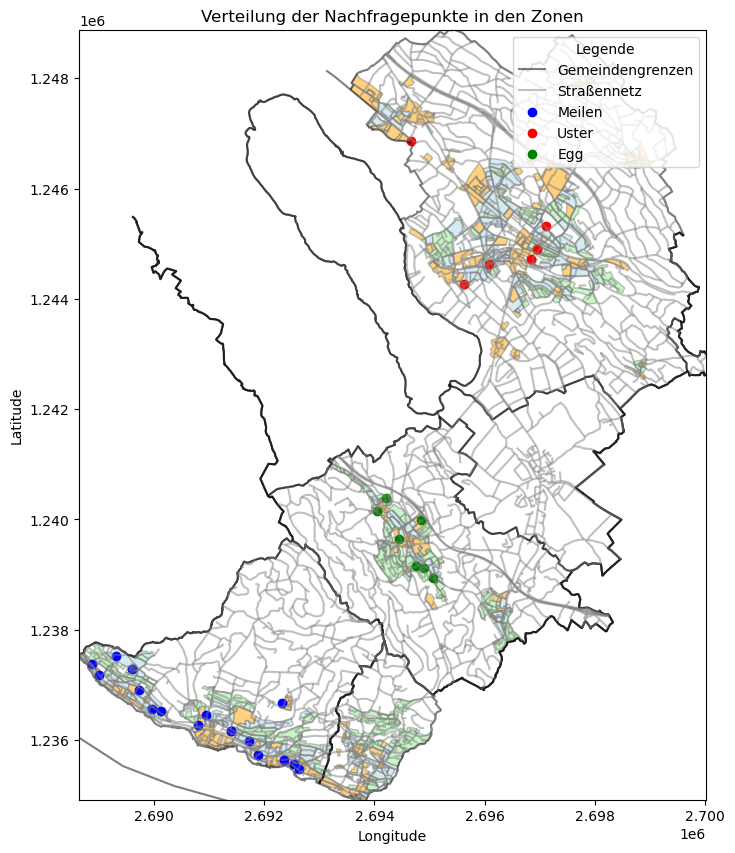

In [ ]:
# Liste der Farben für die Gemeinden
farben = {
    'Meilen': 'blue',
    'Egg': 'green',
    'Uster': 'red'
}

# Funktion zum Plotten der Punkte
def plot_points(ax, punkt, farbe, label):
    ax.scatter(punkt.x, punkt.y, color=farbe, label=label)

# Sortieren der Punkte nach ihrem Zeitstempel
alle_punkte = []
alle_punkte.extend([(punkt, 'Meilen', timestamp) for punkt, timestamp in zip(punkte_meilen_zentral_gdf.geometry, timestamp_meilen_zentral)])
alle_punkte.extend([(punkt, 'Meilen', timestamp) for punkt, timestamp in zip(punkte_meilen_höhere_Dichte_gdf.geometry, timestamp_meilen_höhere_Dichte)])
alle_punkte.extend([(punkt, 'Meilen', timestamp) for punkt, timestamp in zip(punkte_meilen_niedrige_Dichte_gdf.geometry, timestamp_meilen_niedrige_Dichte)])
alle_punkte.extend([(punkt, 'Egg', timestamp) for punkt, timestamp in zip(punkte_egg_zentral_gdf.geometry, timestamp_egg_zentral)])
alle_punkte.extend([(punkt, 'Egg', timestamp) for punkt, timestamp in zip(punkte_egg_höhere_Dichte_gdf.geometry, timestamp_egg_höhere_Dichte)])
alle_punkte.extend([(punkt, 'Egg', timestamp) for punkt, timestamp in zip(punkte_egg_niedrige_Dichte_gdf.geometry, timestamp_egg_niedrige_Dichte)])
alle_punkte.extend([(punkt, 'Uster', timestamp) for punkt, timestamp in zip(punkte_uster_zentral_gdf.geometry, timestamp_uster_zentral)])
alle_punkte.extend([(punkt, 'Uster', timestamp) for punkt, timestamp in zip(punkte_uster_höhere_Dichte_gdf.geometry, timestamp_uster_höhere_Dichte)])
alle_punkte.extend([(punkt, 'Uster', timestamp) for punkt, timestamp in zip(punkte_uster_niedrige_Dichte_gdf.geometry, timestamp_uster_niedrige_Dichte)])

alle_punkte.sort(key=lambda x: x[2])  # Sortieren nach Zeitstempel

# Plotten der Punkte nacheinander
fig, ax = plt.subplots(figsize=(10, 10))
gemeindengrenzen_gdf.plot(ax=ax, color='black', edgecolor='black', alpha=0.5, label='Gemeindengrenzen')
gemeinden_zentral_gdfs.plot(ax=ax, color='orange', edgecolor='gray', alpha=0.5, label='Zentral')
gemeinden_höhere_Dichte_gdfs.plot(ax=ax, color='lightblue', edgecolor='gray', alpha=0.5, label='Höhere Dichte')
gemeinden_niedrige_Dichte_gdfs.plot(ax=ax, color='lightgreen', edgecolor='gray', alpha=0.5, label='Niedrige Dichte')

# Plotten des Straßennetzes
strassennetz_gdf.plot(ax=ax, color='gray', alpha=0.5, label='Straßennetz')
plt.title('Verteilung der Nachfragepunkte in den Zonen')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

legend_labels = set()  # Set zum Speichern der bereits hinzugefügten Legendenlabels

for punkt, gemeinde, timestamp in alle_punkte:
    if gemeinde not in legend_labels:
        plot_points(ax, punkt, farben[gemeinde], gemeinde)
        legend_labels.add(gemeinde)
    else:
        plot_points(ax, punkt, farben[gemeinde], None)  # Kein Label für bereits vorhandene Legendenlabel
    ax.set_xlim([strassennetz_gdf.total_bounds[0], strassennetz_gdf.total_bounds[2]])
    ax.set_ylim([strassennetz_gdf.total_bounds[1], strassennetz_gdf.total_bounds[3]])
    ax.legend(title='Legende')

    display(fig)
    clear_output(wait=True)
    time.sleep(0.5)  # Pause zwischen den Punkten

plt.show()
